In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn import linear_model

In [7]:
industry_portfolios = pd.read_excel('Industry_Portfolios.xlsx',index_col="Date")
industry_portfolios

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [8]:
market_portfolio = pd.read_excel('Market_Portfolio.xlsx', index_col = 0)
market_portfolio

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [10]:
risk_factors = pd.read_excel('Risk_Factors.xlsx', index_col = 0)

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [11]:
risk_free = pd.DataFrame(risk_factors['Rf'])
risk_free

,Rf
Date,
200401,0.07
200402,0.06
200403,0.09
200404,0.08
200405,0.06
...,...
201308,0.00
201309,0.00
201310,0.00


In [13]:
industry_minus_rfr = industry_portfolios - risk_free.values
industry_minus_rfr

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [101]:
sharpe = (industry_minus_rfr.mean())/np.sqrt(industry_minus_rfr.var())

Text(0, 0.5, 'Sharpe Ratio')

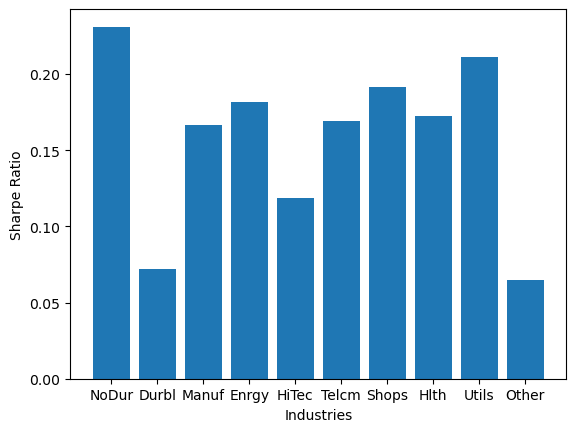

In [102]:
plt.bar(industry_minus_rfr.columns, sharpe)
plt.xlabel('Industries')
plt.ylabel('Sharpe Ratio')

In [19]:
alpha_beta_table = pd.DataFrame(columns = ['Alpha', 'Beta'])

for i in industry_portfolios.columns:
    slope, intercept, r_value, p_value, std_err = linregress(risk_factors['Rm-Rf'],
                                                             industry_minus_rfr[i])
    
    row_data = [intercept, slope]
    alpha_beta_table.loc[i] = row_data

alpha_beta_table

,Alpha,Beta
NoDur,0.369717,0.653744
Durbl,-0.417903,1.649374
Manuf,0.160494,1.167929
Enrgy,0.504485,0.965527
HiTec,-0.064024,1.132387
Telcm,0.194348,0.901721
Shops,0.274093,0.829515
Hlth,0.236968,0.675890
Utils,0.446523,0.537009
Other,-0.387508,1.206992


In [20]:
industry_minus_rfr.mean()

NoDur    0.775583
Durbl    0.606083
Manuf    0.885583
Enrgy    1.103917
HiTec    0.639000
Telcm    0.754167
Shops    0.789083
Hlth     0.656583
Utils    0.779917
Other    0.361833
dtype: float64

In [21]:
treynor = industry_minus_rfr.mean()/alpha_beta_table['Beta']
treynor

NoDur    1.186372
Durbl    0.367463
Manuf    0.758251
Enrgy    1.143330
HiTec    0.564295
Telcm    0.836363
Shops    0.951258
Hlth     0.971435
Utils    1.452334
Other    0.299781
dtype: float64

Text(0, 0.5, 'Treynor Ratio')

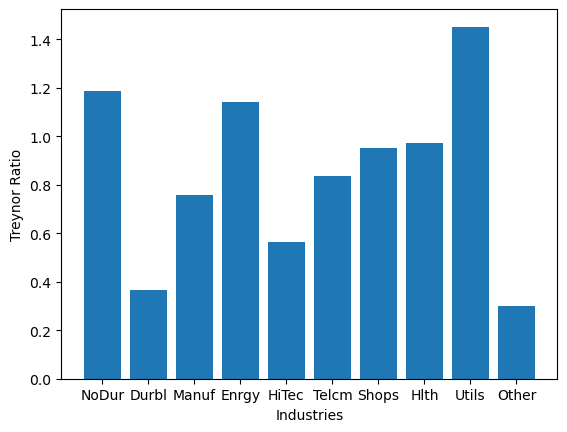

In [100]:
plt.bar(industry_minus_rfr.columns, treynor)
plt.xlabel('Industries')
plt.ylabel('Treynor Ratio')

In [83]:
semivar = industry_minus_rfr.copy()

In [85]:
semivar[semivar > 0 ] = 0

In [90]:
semivar

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00
200402,0.00,-0.13,0.00,0.00,-2.98,-0.58,0.00,0.00,0.00,0.00
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.00,-4.05,0.00,-0.72
200404,0.00,0.00,-0.25,0.00,-4.99,-0.56,-2.78,0.00,-3.63,-3.84
200405,-1.95,-1.70,0.00,0.00,0.00,-3.01,0.00,-0.48,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
201310,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [92]:
semivar_returns = (semivar*semivar).mean()

In [103]:
sortino = industry_minus_rfr.mean()/np.sqrt(semivar_returns)

Text(0, 0.5, 'Sortino Ratio')

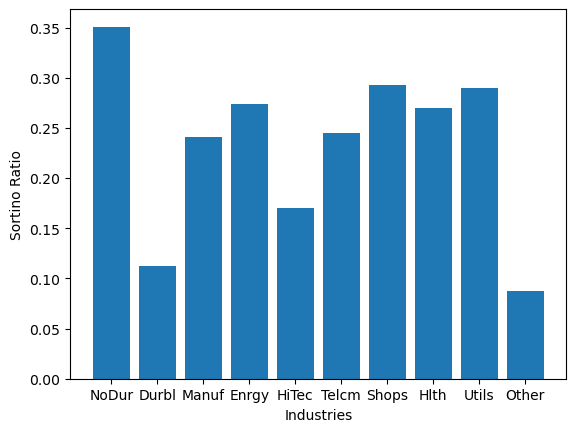

In [104]:
plt.bar(industry_minus_rfr.columns, sortino)
plt.xlabel('Industries')
plt.ylabel('Sortino Ratio')

In [105]:
alpha = alpha_beta_table['Alpha']

Text(0, 0.5, 'Jensens Alpha')

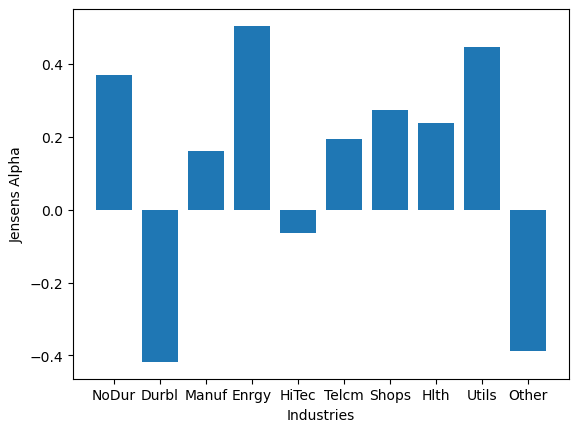

In [106]:
plt.bar(industry_minus_rfr.columns, alpha)
plt.xlabel('Industries')
plt.ylabel('Jensens Alpha')

In [181]:
risk_factors

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46
201309,0.00,3.76,2.85,-1.59
201310,0.00,4.17,-1.56,1.31


In [182]:
X = risk_factors[['Rm-Rf', 'SMB', 'HML']]

In [200]:
tf_alpha = pd.Series()

for i in industry_portfolios.columns:
    intercept = linear_model.LinearRegression().fit(X, industry_minus_rfr[i]).intercept_
    tf_alpha.loc[i] = intercept

print(tf_alpha)

NoDur    0.386704
Durbl   -0.474342
Manuf    0.153285
Enrgy    0.523007
HiTec   -0.065979
Telcm    0.200724
Shops    0.255941
Hlth     0.257472
Utils    0.474411
Other   -0.404412
dtype: float64


C:\Users\Darren\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Darren\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Darren\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Darren\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

Text(0, 0.5, 'Three Factor Alpha')

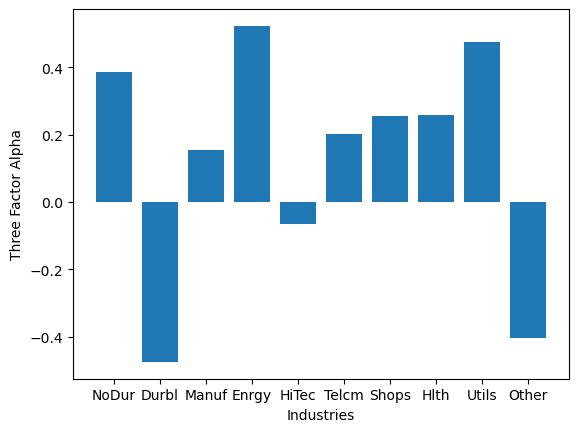

In [201]:
plt.bar(industry_minus_rfr.columns, tf_alpha)
plt.xlabel('Industries')
plt.ylabel('Three Factor Alpha')

In [202]:
metrics = pd.DataFrame(data = (sharpe, treynor, sortino, alpha, tf_alpha),
                       index = ['Sharpe', 'Treynor', 'Sortino', 'Jensens Alpha', 'Three Factor Alpha']).T

In [203]:
metrics

,Sharpe,Treynor,Sortino,Jensens Alpha,Three Factor Alpha
NoDur,0.231099,1.186372,0.350804,0.369717,0.386704
Durbl,0.072356,0.367463,0.111967,-0.417903,-0.474342
Manuf,0.166616,0.758251,0.241260,0.160494,0.153285
Enrgy,0.181708,1.143330,0.273612,0.504485,0.523007
HiTec,0.118552,0.564295,0.170620,-0.064024,-0.065979
Telcm,0.169064,0.836363,0.244940,0.194348,0.200724
Shops,0.191753,0.951258,0.293032,0.274093,0.255941
Hlth,0.172529,0.971435,0.270294,0.236968,0.257472
Utils,0.210948,1.452334,0.290044,0.446523,0.474411
Other,0.064693,0.299781,0.087351,-0.387508,-0.404412
